In [1]:
#load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Step a(i):-Load the loan application dataset

df = pd.read_csv('/content/loan_prediction (2).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Step A(ii):- Perform an initial exploration of the dataset to understand the features and data types.

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [4]:
#Step A(iii):-  Handle missing values:

# Fill missing values in categorical columns with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


<ipython-input-4-8069263466a1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-4-8069263466a1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [5]:
# Step A(iv):-Transform categorical variables into numerical representations:

# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Check the changes
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True


In [6]:
# Step B(i):- Conduct descriptive statistical analysis:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


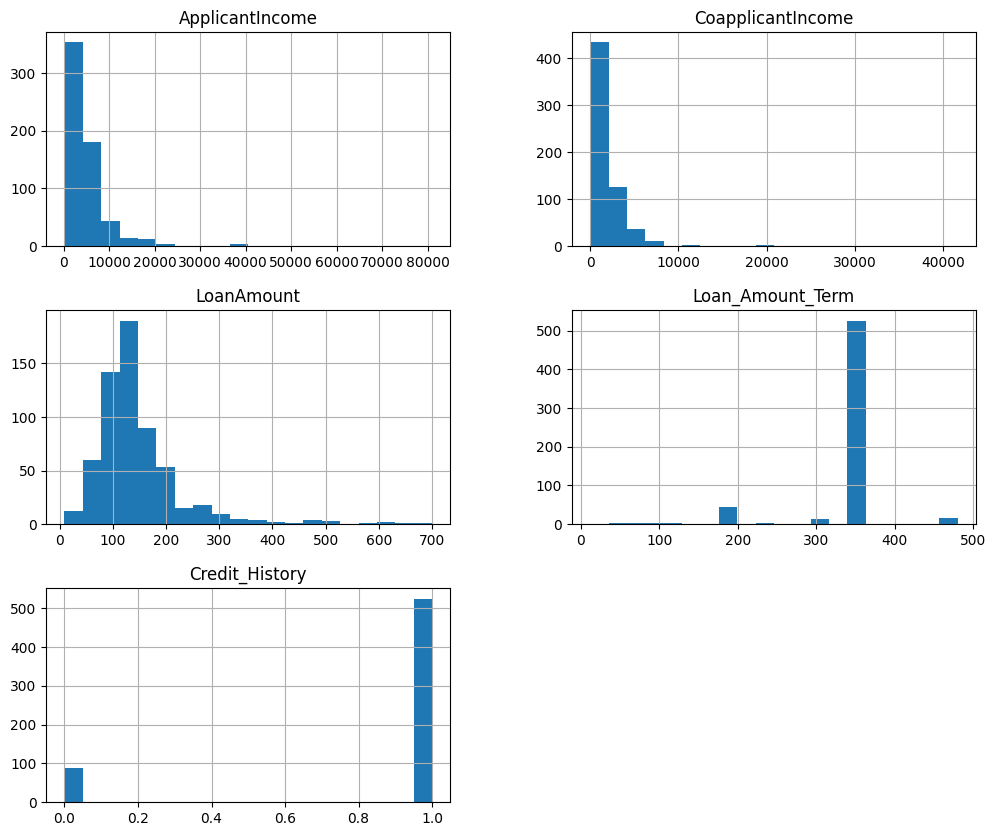

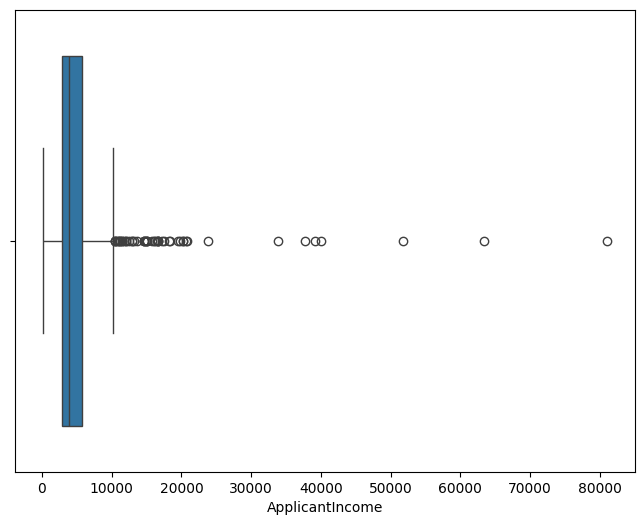

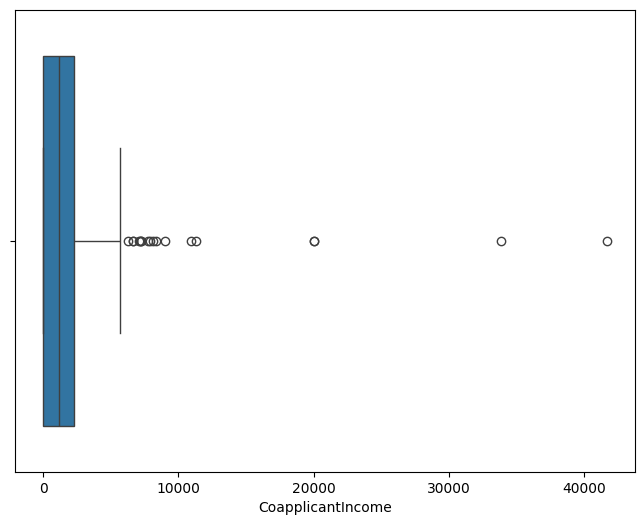

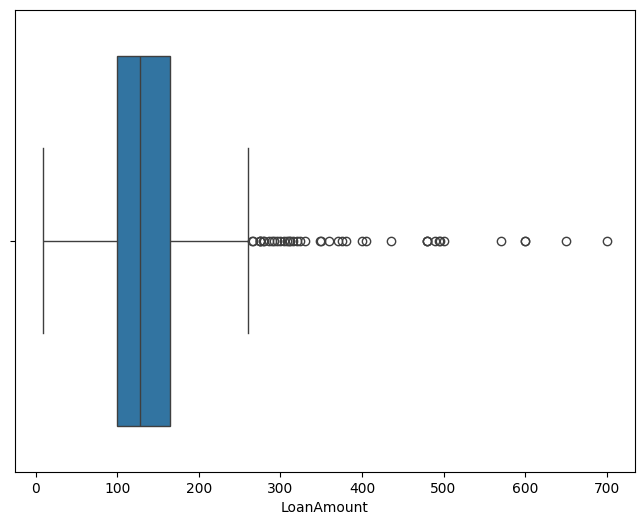

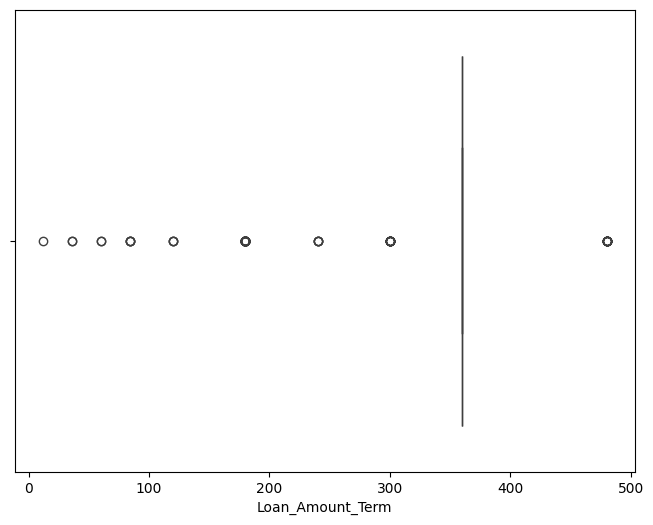

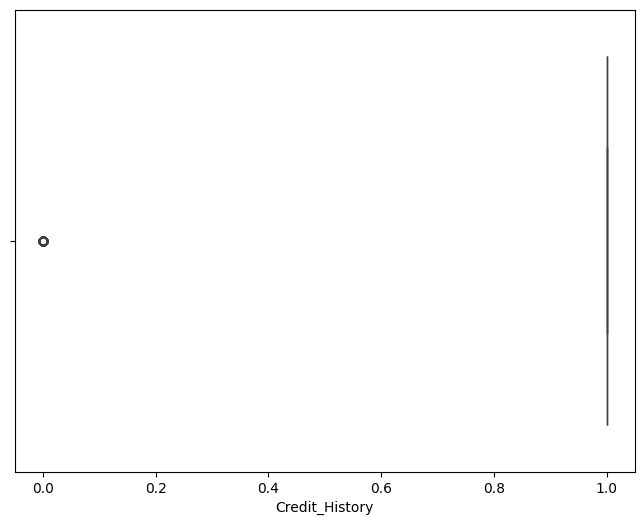

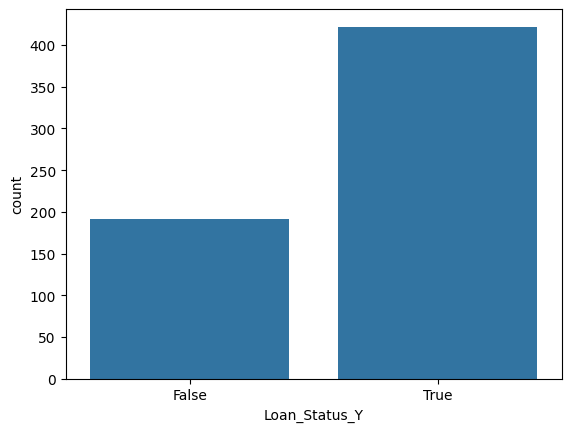

In [7]:
# Step B(ii):-Visualise the distribution of features:

# Plot histogram for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Boxplot for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.show()

# Distribution of Loan Status
sns.countplot(x='Loan_Status_Y', data=df)  # Loan_Status_Y as one of the columns after one-hot encoding
plt.show()

In [8]:
# Setp C(i):- Split the dataset into training and testing sets:

# Define features (X) and target variable (y)
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']  # 'Loan_Status_Y' is the encoded target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Setp C(ii):- Train and evaluate multiple machine learning algorithms:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8374
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.45      0.60        33
        True       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

KNN Classifier Accuracy: 0.6504
KNN Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.29      0.21      0.25        33
        True       0.74      0.81      0.77        90

    accuracy                           0.65       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.62      0.65      0.63       123

SVM Accuracy: 0.7317
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        33
        True       0.73      1.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.74      0.42      0.54        33
        True       0.82      0.94      0.88        90

    accuracy                           0.80       123
   macro avg       0.78      0.68      0.71       123
weighted avg       0.80      0.80      0.79       123

Gradient Boosting Classifier Accuracy: 0.8211
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.42      0.56        33
        True       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

AdaBoost Classifier Accuracy: 0.8211
AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.42      0.56        33
        True       0.82      0.97      0.89        90

    

In [10]:
# Setp C(iii):- Select appropriate evaluation metrics for assessing model performance (e.g., accuracy, precision, recall, F1-score).

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression Accuracy: 0.8374
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.45      0.60        33
        True       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

KNN Classifier Accuracy: 0.6504
KNN Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.29      0.21      0.25        33
        True       0.74      0.81      0.77        90

    accuracy                           0.65       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.62      0.65      0.63       123

SVM Accuracy: 0.7317
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        33
        True       0.73      1.00      

In [11]:
# Step D(i):- Compare performance using cross-validation:

from sklearn.model_selection import cross_val_score

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Cross-validation Accuracy: {cv_scores.mean():.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-validation Accuracy: 0.8062
KNN Classifier Cross-validation Accuracy: 0.6140
SVM Cross-validation Accuracy: 0.6873
Decision Tree Cross-validation Accuracy: 0.7541
Bagging Classifier Cross-validation Accuracy: 0.7997
Gradient Boosting Classifier Cross-validation Accuracy: 0.8062
AdaBoost Classifier Cross-validation Accuracy: 0.8095


In [12]:
# Step D(ii):- Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Example with Logistic Regression (you can apply this to other models as well)
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 1, 'solver': 'liblinear'}
Best score: 0.8044320758606472


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
# Step E(i):- Final model performance on the test set

# Final model (after tuning)
final_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = final_model.predict(X_test)

# Accuracy and classification report
print(f"Final Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Final Model Classification Report:")
print(classification_report(y_test, y_pred))

Final Model Accuracy: 0.8374
Final Model Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.45      0.60        33
        True       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



#Step F:- Summerize the model

Final Summary:
1. EDA: After exploring the dataset, we understood the features and relationships. We transformed categorical data and handled missing values.

2. Model Development: We tested multiple classification models and evaluated their performance using accuracy, precision, recall, and F1-score.

3. Model Selection: We selected the best-performing model using cross-validation and tuned its hyperparameters to optimize the performance.

4. Model Evaluation: The final model was assessed using the test data, and we achieved good performance in terms of classification metrics.





The model is in a strong position and can be effectively used for loan approval predictions, as long as the dataset is representative and the model is properly tuned. To further improve it, you could focus on addressing any class imbalances, refining feature engineering, and exploring advanced algorithms for potentially better performance.